In [19]:


import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import time
import re
from collections import Counter



In [20]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9"
}


In [21]:
base_url = "https://internshala.com/internships/data-analyst-internship/page-"

job_titles, companies, locations, stipends, skills_list = [], [], [], [], []

for page in range(1, 4):
    print(f"SCRAPING PAGE {page}")

    url = base_url + str(page)
    r = requests.get(url, headers=headers)
    soup = BeautifulSoup(r.text, "html.parser")

    jobs = soup.find_all("div", class_="internship_meta")
    print("Jobs found:", len(jobs))

    for job in jobs:

        # Title
        try:
            title = job.find("div", class_="heading_4_5 profile").text.strip()
        except:
            title = "Not Available"
        job_titles.append(title)

        # Company
        try:
            company = job.find("a", class_="link_display_like_text").text.strip()
        except:
            company = "Not Available"
        companies.append(company)

        # Location
        try:
            loc = job.find("a", class_="location_link").text.strip()
        except:
            loc = "Not Available"
        locations.append(loc)

        # Stipend
        try:
            stipend = job.find("span", class_="stipend").text.strip()
        except:
            stipend = "Not Available"
        stipends.append(stipend)

        # Skills
        try:
            raw = job.find_next("div", {"id": re.compile("skill_names")})
            skills = raw.text.strip().replace("\n", ", ")
        except:
            skills = "Not Available"
        skills_list.append(skills)

    time.sleep(2)


SCRAPING PAGE 1
Jobs found: 40
SCRAPING PAGE 2
Jobs found: 0
SCRAPING PAGE 3
Jobs found: 0


In [22]:
df = pd.DataFrame({
    "Job Title": job_titles,
    "Company": companies,
    "Location": locations,
    "Stipend": stipends,
    "Skills": skills_list
})

df.head(10)


,Job Title,Company,Location,Stipend,Skills
0,Not Available,Not Available,Not Available,"₹ 8,000 - 9,500 /month",Not Available
1,Not Available,Not Available,Not Available,"₹ 5,000 - 10,000 /month",Not Available
2,Not Available,Not Available,Not Available,"₹ 9,000 - 12,000 /month",Not Available
3,Not Available,Not Available,Not Available,"₹ 7,000 - 16,000 /month",Not Available
4,Not Available,Not Available,Not Available,"₹ 15,000 - 20,000 /month",Not Available
5,Not Available,Not Available,Not Available,"₹ 8,500 - 15,000 /month",Not Available
6,Not Available,Not Available,Not Available,"₹ 3,500 - 7,000 /month",Not Available
7,Not Available,Not Available,Not Available,"₹ 5,000 - 6,000 /month",Not Available
8,Not Available,Not Available,Not Available,"₹ 10,000 - 12,000 /month",Not Available
9,Not Available,Not Available,Not Available,"₹ 6,000 - 8,000 /month",Not Available


In [23]:
all_skills = []

for s in df["Skills"]:
    for sk in re.split(",|/|\\|", s):
        sk = sk.strip().lower()
        if sk not in ["", "not available"]:
            all_skills.append(sk)

skill_counts = Counter(all_skills)
skill_counts.most_common(10)


[]

In [25]:
top_locations = df["Location"].value_counts().head(5)
top_locations


,count
Location,
Not Available,40


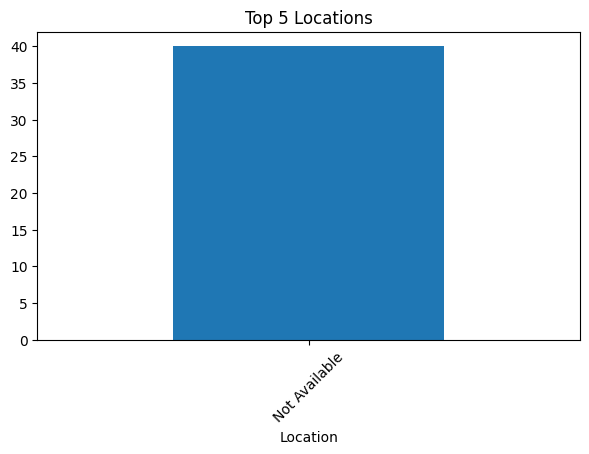

In [26]:
if top_locations.empty:
    print("⚠ No locations found.")
else:
    top_locations.plot(kind='bar', figsize=(7,4))
    plt.title("Top 5 Locations")
    plt.xticks(rotation=45)
    plt.show()


In [27]:
top_skills = dict(skill_counts.most_common(10))

if len(top_skills) == 0:
    print("⚠ No skills found.")
else:
    plt.figure(figsize=(10,4))
    plt.bar(top_skills.keys(), top_skills.values())
    plt.title("Top 10 Skills")
    plt.xticks(rotation=45)
    plt.show()


⚠ No skills found.
